<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Hospital Problem</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Data information](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data Processing](#2.2)

> - 2.2.1 [Drop Column](#2.2.1) 
> - 2.2.2 [Convert length of stay to 0 and 1](#2.2.2)
> - 2.2.2 [Convert Unknown](#2.2.2)


2.3 [Check missing values](#2.3)

2.4 [Data type](#2.4)

2.5 [Upper Case the content](#2.5)

2.6 [Extra-whitespaces](#2.6)

2.7 [Descriptive statistics for Central Tendency](#2.7)

2.8 [Detect Outlier](#2.8)

2.9 [Save The Intermediate Data](#2.9)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

3.2 [Frequency of each corresponiding Target variable type](#3.2)

3.3 [Summary](#3.3)

<br>

### 4. [Statistic Overview](#4)

4.1 [Descriptive statistics for Variability](#4.1)

4.2 [Correlation Matrix and Heatmap](#4.2)

> 4.2.1 [Correlation Matrix](#4.2.1)

> 4.2.2 [Heat map](#4.2.2)

4.3 [Statistical Test for Correlation](#4.3)

<br>

### 5. [Feature Engineering](#5) 

5.1 [Separating dependent and independent variables](#5.1)

5.2 [Descriptive statistics for Variability](#5.2)

5.3 [Descriptive statistics for Variability](#5.3)

<br>

### 6. [Model Building](#6) 

5.1 [Logistic Regression](#5.1)

5.1 [Feature Scaling](#5.2)

5.1 [Feature Scaling](#5.3)

5.1 [Feature Scaling](#5.4)


<br>

### 7. [Conculsions](#7)

<br>

### 8. [References](#8)

<br>

### 9. [Appendix](#9)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ✴️ 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders

# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.2"></a>
# 📲 1.2 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

> **Sample train Dataset**

In [3]:
## Importing the datasets
train = pd.read_csv("Data/train_data.csv", delimiter=',', skipinitialspace = True)

train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(train.shape))

# drop Unnamed, it is just a number given to identify each house
train.head(3)

The shape of the ORGINAL data is (row, column): (59966, 16)


,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1


> **Sample test Dataset**

In [4]:
test = pd.read_csv("Data/test_data.csv", delimiter=',', skipinitialspace = True)

test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(test.shape))

# drop Unnamed, it is just a number given to identify each house
test.head(3)

The shape of the ORGINAL data is (row, column): (69177, 15)


,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,1,New York City,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,2,New York City,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,3,New York City,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74


<a id="1.3"></a>
# 🔈 1.3 Data Information

> **Sample train Dataset**

In [5]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())

The shape of the train data is (row, column):(59966, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFaci

> **Sample test Dataset**

In [6]:
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the test data is (row, column):(69177, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69177 entries, 0 to 69176
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            69177 non-null  int64 
 1   HealthServiceArea             69177 non-null  object
 2   Gender                        69177 non-null  object
 3   Race                          69177 non-null  object
 4   TypeOfAdmission               69177 non-null  object
 5   CCSProcedureCode              69177 non-null  int64 
 6   APRSeverityOfIllnessCode      69177 non-null  int64 
 7   PaymentTypology               69177 non-null  object
 8   BirthWeight                   69177 non-null  int64 
 9   EmergencyDepartmentIndicator  69177 non-null  object
 10  AverageCostInCounty           69177 non-null  int64 
 11  AverageChargesInCounty        69177 non-null  int64 
 12  AverageCostInFacil

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
The dataset is splitted into two groups:
- Train set (train.csv)
- Test set (test.csv)

Now let's go through the features and describe a little:
***
**Categorical:** 
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **HealthServiceArea** (A description of the Health Service Area (HSA) in which the hospital is located)
   > - **TypeOfAdmission** 
   (A description of   the manner in which the patient was admitted to the health care facility)
            Newborn
            Emergency 
            Urgent
            Elective
   > - **Race** (Patient race)
            White
            Other Race 
            Black/African American
            Multi-racial
   > - **PaymentTypology** (A description of the type of payment for this occurrence.)
        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Gender**
            F
            M
   > - **EmergencyDepartmentIndicator** 
   (Emergency Department Indicator is set based on the submitted revenue codes. If the record contained an Emergency       Department revenue code of 045X)
            Y
            N
***
**Numeric:**
- **Discrete**
  >  - **ID**(Unique identifing # for each passenger)
  >  - **CCSProcedureCode** (AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code)
  >  - **APRSeverityOfIllnessCode** (All Patient  Refined Severity of Illness (APR SOI) Description) 
             Minor (1)
             Moderate (2)   
             Major (3)
             Extreme (4))
  >  - **LengthOfStay** (The total number  of patient days at an acute level and/or other than acute care level.)

- **Continous**
>  - **BirthWeight** (The neonate birth weight in grams; rounded to nearest)
>  - **AverageCostInCounty** (Average hospitalization Cost In County of the patient)
>  - **AverageChargesInCounty** (Average medical Charges In County of the patient)
>  - **AverageCostInFacility** (Average Cost In Facility)
>  - **AverageChargesInFacility** (Average Charges cost In Facility)
>  - **AverageIncomeInZipCode** (Average Income In Zip Code)
>  - **LengthOfStay** (The total number  of patient days at an acute level and/or other than acute care level.)

<a id="2.2"></a>
# ❌ 2.2 Data preprocessing
***

<a id="2.2.1"></a>
## 2.2.1 Drop column
***
- In order to avoid data leakage, I desire to drop column `ID`.
- I also desire to drop `HealthServiceArea` since it does not contain the specific location, and there is no correlation between `HealthServiceArea` and `LengthOfStay`.

In [7]:
train = train.drop(columns=['ID', 'HealthServiceArea', 'AverageIncomeInZipCode'])
test = test.drop(columns=['ID', 'HealthServiceArea', 'AverageIncomeInZipCode'])

<a id="2.2.2"></a>
## 2.2.2 Convert length of stay to 0 and 1
***
Since the requirement is to predict whether the paintient is stay in the hospital longer than 3 days.

In [8]:
train['LengthOfStay'] = train['LengthOfStay'].apply(lambda x: 1 if x > 3 else 0)

<a id="2.2.3"></a>
## 2.2.3 Convert Unknown
***
Since the `Gender` column still has only one values `U`, I do not think it will effect the values so I decided to convert it to `F`.

In [9]:
train.loc[train['Gender'].isin(['U']), 'Gender'] = 'F'
test.loc[test['Gender'].isin(['U']), 'Gender'] = 'F'

<a id="2.2.4"></a>
## 2.2.4 Check column contains
***

> **Gender column**

In [10]:
categories = list(train['Gender'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

M
F


In [11]:
categories = list(test['Gender'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

M
F


### ------> OBSERVATION
*****
I want to replace `M` with `Male` and `F` with `Female`

In [12]:
#Train dataset
train.loc[train['Gender'].isin(['F']), 'Gender'] = 'Female'
train.loc[train['Gender'].isin(['M']), 'Gender'] = 'Male'

#Test dataset
test.loc[test['Gender'].isin(['F']), 'Gender'] = 'Female'
test.loc[test['Gender'].isin(['M']), 'Gender'] = 'Male'

> **Race column**

In [13]:
categories = list(train['Race'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

White
Other Race
Black/African American
Multi-racial


In [14]:
categories = list(test['Race'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

White
Other Race
Black/African American
Multi-racial


> **TypeOfAdmission column**

In [15]:
categories = list(train['TypeOfAdmission'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Newborn
Emergency
Urgent
Elective


In [16]:
categories = list(test['TypeOfAdmission'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Newborn
Emergency
Urgent
Elective
Trauma


> **CCSProcedureCode column**

In [17]:
categories = list(train['CCSProcedureCode'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

228
115
0
220
231
-1
216


In [18]:
categories = list(test['CCSProcedureCode'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

228
0
220
115
231
216
-1


### ------> OBSERVATION
*****
### ***Some Domain Knowledge:***
<br>
According to an official website of the Department of Health & Human Services, developed at the Agency for Healthcare Research and Quality (AHRQ), the Clinical Classifications Software (CCS) is a tool for clustering patient diagnoses and procedures into a manageable number of clinically meaningful categories. CCS offers researchers the ability to group conditions and procedures without having to sort through thousands of codes. This "clinical grouper" makes it easier to quickly understand patterns of diagnoses and procedures so that health plans, policy makers, and researchers can analyze costs, utilization, and outcomes associated with particular illnesses and procedures.

> ----> There is a value `-1` which is not belong to the CCSProcedureCode list. So I desire to replace it with number `1`.

In [19]:
#Train dataset
train.loc[train['CCSProcedureCode'] == -1 , 'CCSProcedureCode'] = 1

#Test dataset
test.loc[test['CCSProcedureCode'] == -1 , 'CCSProcedureCode'] = 1

> **APRSeverityOfIllnessCode column**

In [20]:
categories = list(train['APRSeverityOfIllnessCode'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

1
2
3
4


In [21]:
categories = list(test['APRSeverityOfIllnessCode'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

1
2
3
4


> **PaymentTypology column**

In [22]:
categories = list(train['PaymentTypology'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Medicaid
Private Health Insurance
Blue Cross/Blue Shield
Self-Pay
Federal/State/Local/VA
Managed Care, Unspecified
Miscellaneous/Other
Medicare
Unknown


In [23]:
categories = list(test['PaymentTypology'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Medicaid
Private Health Insurance
Blue Cross/Blue Shield
Self-Pay
Managed Care, Unspecified
Federal/State/Local/VA
Medicare
Miscellaneous/Other
Unknown
Department of Corrections


> **BirthWeight column**

<AxesSubplot:>

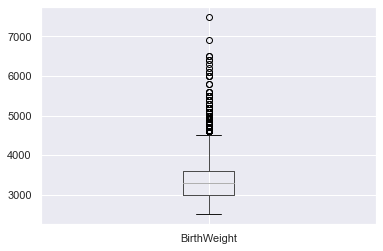

In [24]:
train.boxplot('BirthWeight')

<AxesSubplot:>

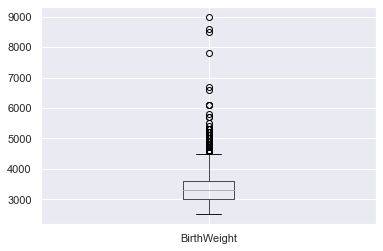

In [25]:
test.boxplot('BirthWeight')

> **EmergencyDepartmentIndicator column**

In [26]:
categories = list(train['EmergencyDepartmentIndicator'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

N
Y


In [27]:
categories = list(test['EmergencyDepartmentIndicator'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

N
Y


> **AverageCostInCounty column**

<AxesSubplot:>

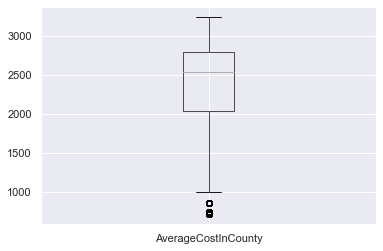

In [28]:
train.boxplot('AverageCostInCounty')

<AxesSubplot:>

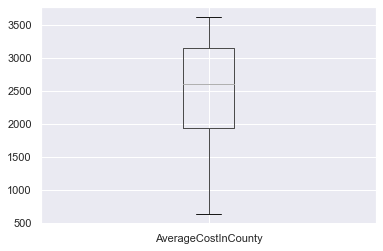

In [29]:
test.boxplot('AverageCostInCounty')

> **AverageChargesInCounty column**

<AxesSubplot:>

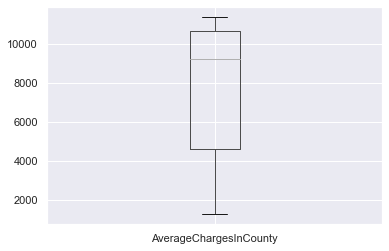

In [30]:
train.boxplot('AverageChargesInCounty')

<AxesSubplot:>

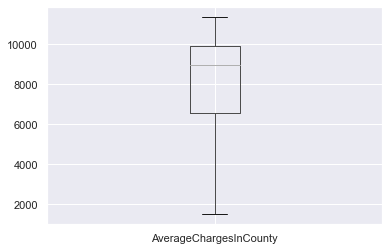

In [31]:
test.boxplot('AverageChargesInCounty')

> **AverageCostInFacility column**

<AxesSubplot:>

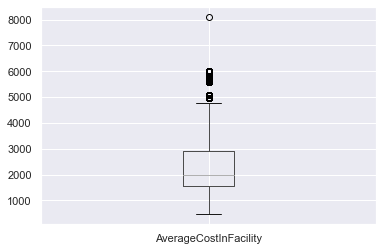

In [32]:
train.boxplot('AverageCostInFacility')

<AxesSubplot:>

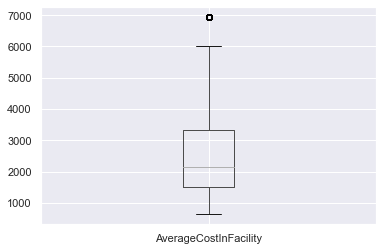

In [33]:
test.boxplot('AverageCostInFacility')

> **AverageChargesInFacility column**

<AxesSubplot:>

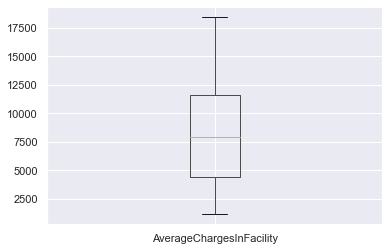

In [34]:
train.boxplot('AverageChargesInFacility')

<AxesSubplot:>

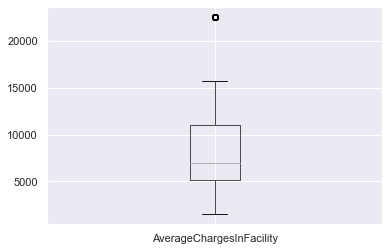

In [35]:
test.boxplot('AverageChargesInFacility')

<a id="2.3"></a>
# 🔍 2.3 Check missing values:
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

> **Sample train Dataset**

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


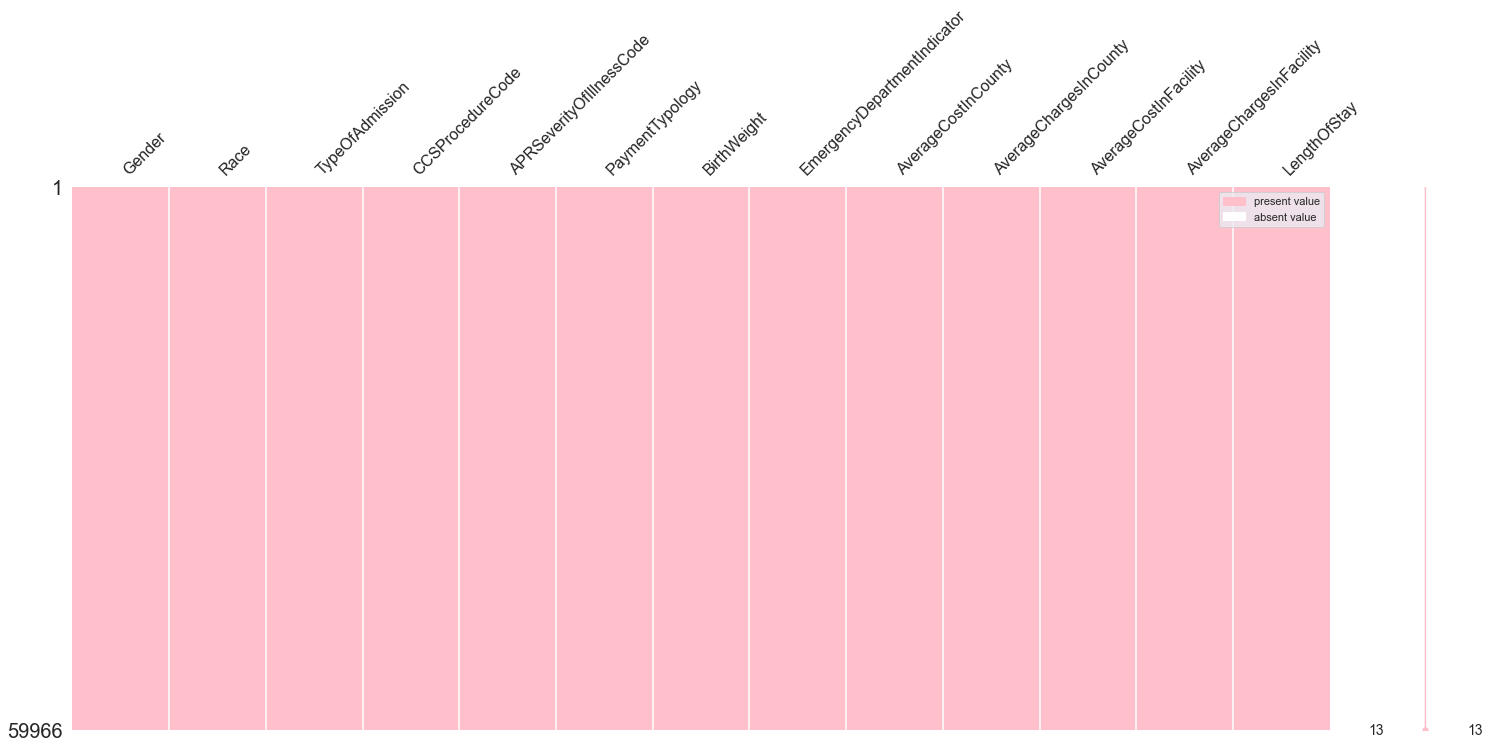

In [36]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(train).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(train, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

> **Sample test Dataset**

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


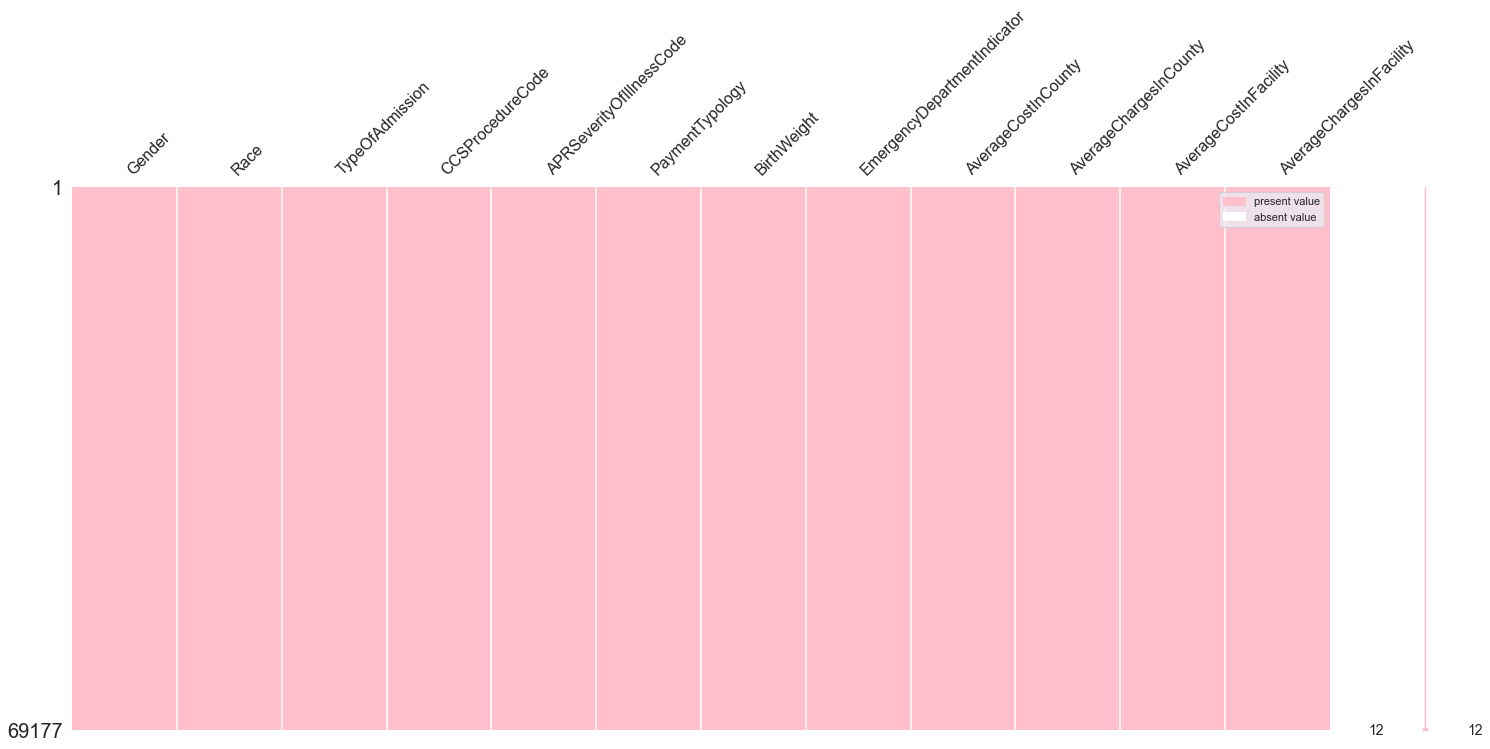

In [37]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(test).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION
*****
Suprisingly, there is no missing data in both of the dataset.

<a id="2.4"></a>
# 🦄 2.4 Data type
***

> **Sample train Dataset**

In [38]:
train['TypeOfAdmission'] = train['TypeOfAdmission'].astype('string')
train['Race'] = train['Race'].astype('string')
train['PaymentTypology'] = train['PaymentTypology'].astype('string')
train['Gender'] = train['Gender'].astype('string')
train['EmergencyDepartmentIndicator'] = train['EmergencyDepartmentIndicator'].astype('string')
train['CCSProcedureCode'] = train['CCSProcedureCode'].astype('int')
train['APRSeverityOfIllnessCode'] = train['APRSeverityOfIllnessCode'].astype('int')
train['LengthOfStay'] = train['LengthOfStay'].astype('int')
train['BirthWeight'] = train['BirthWeight'].astype('int')
train['AverageCostInCounty'] = train['AverageCostInCounty'].astype('int')
train['AverageChargesInCounty'] = train['AverageChargesInCounty'].astype('int')
train['AverageCostInFacility'] = train['AverageCostInFacility'].astype('int')
train['AverageChargesInFacility'] = train['AverageChargesInFacility'].astype('int')

> **Sample test Dataset**

In [39]:
test['TypeOfAdmission'] = test['TypeOfAdmission'].astype('string')
test['Race'] = test['Race'].astype('string')
test['PaymentTypology'] = test['PaymentTypology'].astype('string')
test['Gender'] = test['Gender'].astype('string')
test['EmergencyDepartmentIndicator'] = test['EmergencyDepartmentIndicator'].astype('string')
test['CCSProcedureCode'] = test['CCSProcedureCode'].astype('int')
test['APRSeverityOfIllnessCode'] = test['APRSeverityOfIllnessCode'].astype('int')
test['BirthWeight'] = test['BirthWeight'].astype('int')
test['AverageCostInCounty'] = test['AverageCostInCounty'].astype('int')
test['AverageChargesInCounty'] = test['AverageChargesInCounty'].astype('int')
test['AverageCostInFacility'] = test['AverageCostInFacility'].astype('int')
test['AverageChargesInFacility'] = test['AverageChargesInFacility'].astype('int')

<a id="2.5"></a>
# 💭 2.5 Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

> **Sample train Dataset**

In [40]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
train = train.applymap(lambda s: s.upper() if type(s) == str else s)
train.head(3)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,LengthOfStay
0,FEMALE,OTHER RACE,NEWBORN,228,1,MEDICAID,3700,N,2611,9227,1751,8951,0
1,MALE,BLACK/AFRICAN AMERICAN,NEWBORN,228,1,MEDICAID,2900,N,3242,8966,3338,6409,0
2,MALE,OTHER RACE,NEWBORN,220,1,PRIVATE HEALTH INSURANCE,3200,N,3155,11381,4980,9323,0


> **Sample test Dataset**

In [41]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
test = test.applymap(lambda s: s.upper() if type(s) == str else s)
test.head(3)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility
0,FEMALE,OTHER RACE,NEWBORN,216,3,MEDICAID,4900,N,3242,8966,2448,13196
1,FEMALE,WHITE,NEWBORN,220,1,MEDICAID,3100,N,2611,9227,1751,8951
2,MALE,MULTI-RACIAL,NEWBORN,115,1,MEDICAID,3300,N,3155,11381,1052,11314


<a id="2.6"></a>
# 📚 2.6 Extra-whitespaces:
***
There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.

In [42]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(train)
whitespace_remover(test)

<a id="2.7"></a>
# 📊 2.7 Descriptive statistics for Central Tendency

> **Sample train Dataset**

In [43]:
# see the static of all numerical column
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CCSProcedureCode,59966.0,155.429877,89.497449,0.0,115.0,220.0,228.0,231.0
APRSeverityOfIllnessCode,59966.0,1.254594,0.546207,1.0,1.0,1.0,1.0,4.0
BirthWeight,59966.0,3336.298903,446.244475,2500.0,3000.0,3300.0,3600.0,7500.0
AverageCostInCounty,59966.0,2372.806690,639.755096,712.0,2041.0,2533.0,2785.0,3242.0
AverageChargesInCounty,59966.0,7979.126922,3220.291347,1243.0,4620.0,9227.0,10644.0,11381.0
AverageCostInFacility,59966.0,2396.414318,1248.501189,457.0,1551.0,1967.0,2895.0,8114.0
AverageChargesInFacility,59966.0,7958.472668,3859.294711,1120.0,4438.0,7945.0,11619.0,18466.0
LengthOfStay,59966.0,0.167945,0.373821,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

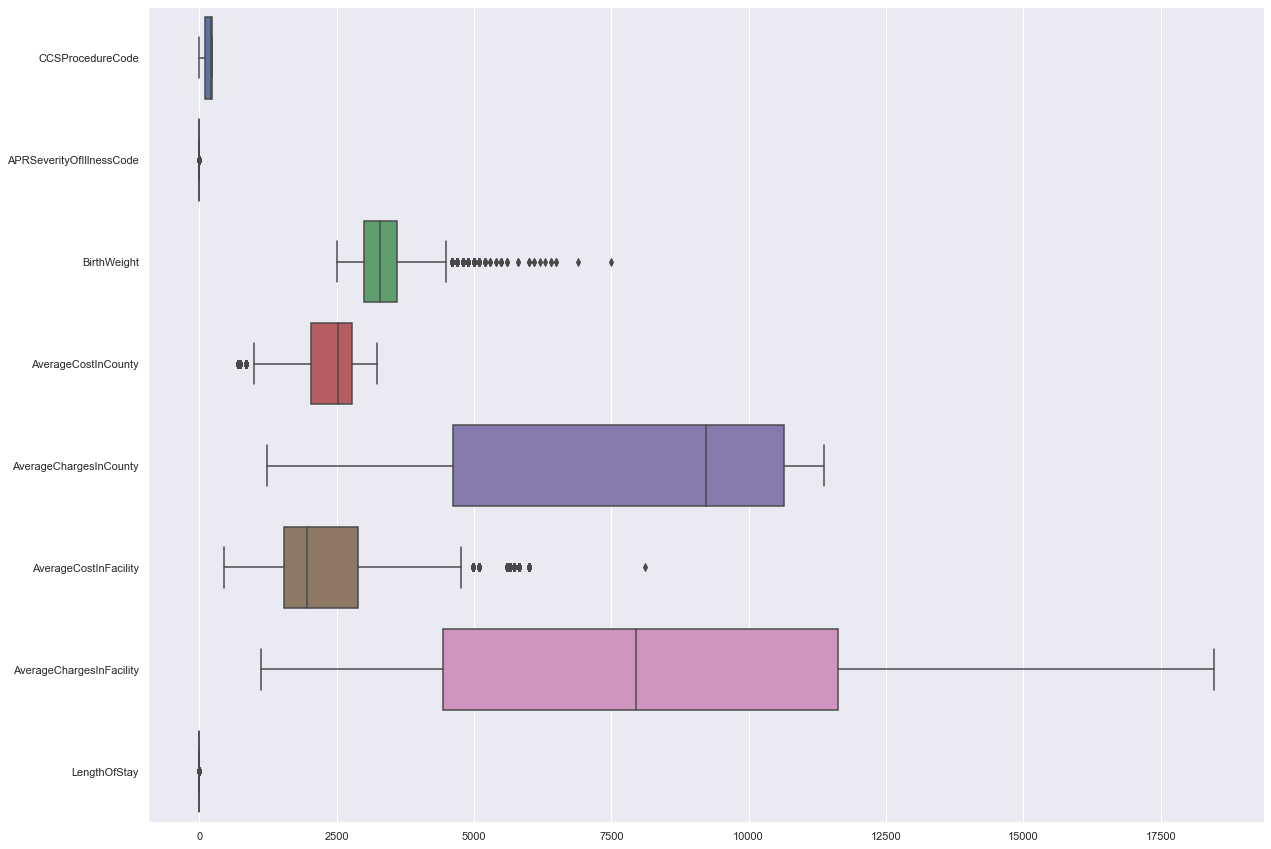

In [44]:
plt.rcParams['figure.figsize'] = [20, 15]
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=train,orient="h")

### ---------> OBSERVATION
> For all numerical columns, I see some outlier values in `AverageCostInFacility` and `BirthWeight`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

> **Sample test Dataset**

In [45]:
# see the static of all numerical column
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CCSProcedureCode,59966.0,155.429877,89.497449,0.0,115.0,220.0,228.0,231.0
APRSeverityOfIllnessCode,59966.0,1.254594,0.546207,1.0,1.0,1.0,1.0,4.0
BirthWeight,59966.0,3336.298903,446.244475,2500.0,3000.0,3300.0,3600.0,7500.0
AverageCostInCounty,59966.0,2372.806690,639.755096,712.0,2041.0,2533.0,2785.0,3242.0
AverageChargesInCounty,59966.0,7979.126922,3220.291347,1243.0,4620.0,9227.0,10644.0,11381.0
AverageCostInFacility,59966.0,2396.414318,1248.501189,457.0,1551.0,1967.0,2895.0,8114.0
AverageChargesInFacility,59966.0,7958.472668,3859.294711,1120.0,4438.0,7945.0,11619.0,18466.0
LengthOfStay,59966.0,0.167945,0.373821,0.0,0.0,0.0,0.0,1.0


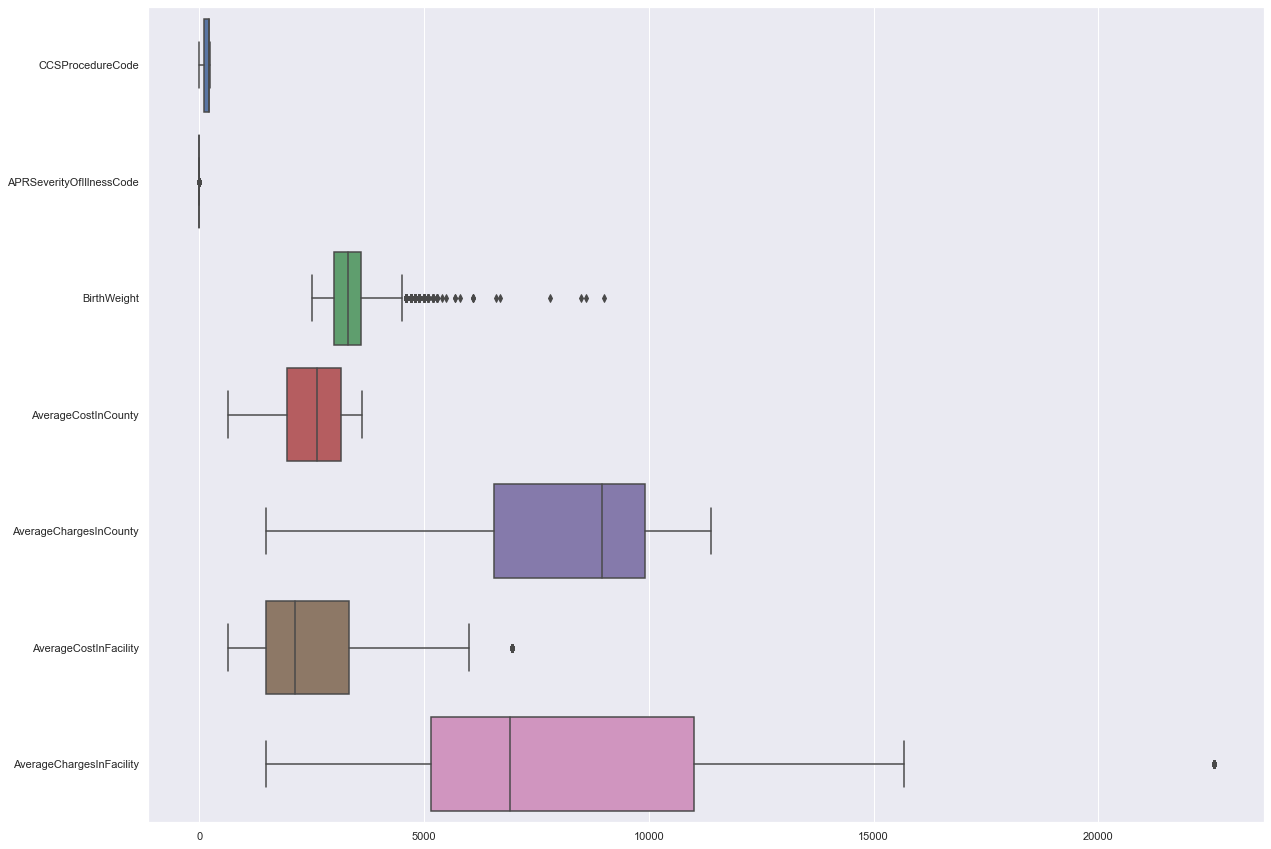

In [46]:
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=test,orient="h")
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
> For all numerical columns, I see some outlier values in `BirthWeight`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

<a id="2.8"></a>
# 💢 2.8 Detect Outlier

<AxesSubplot:>

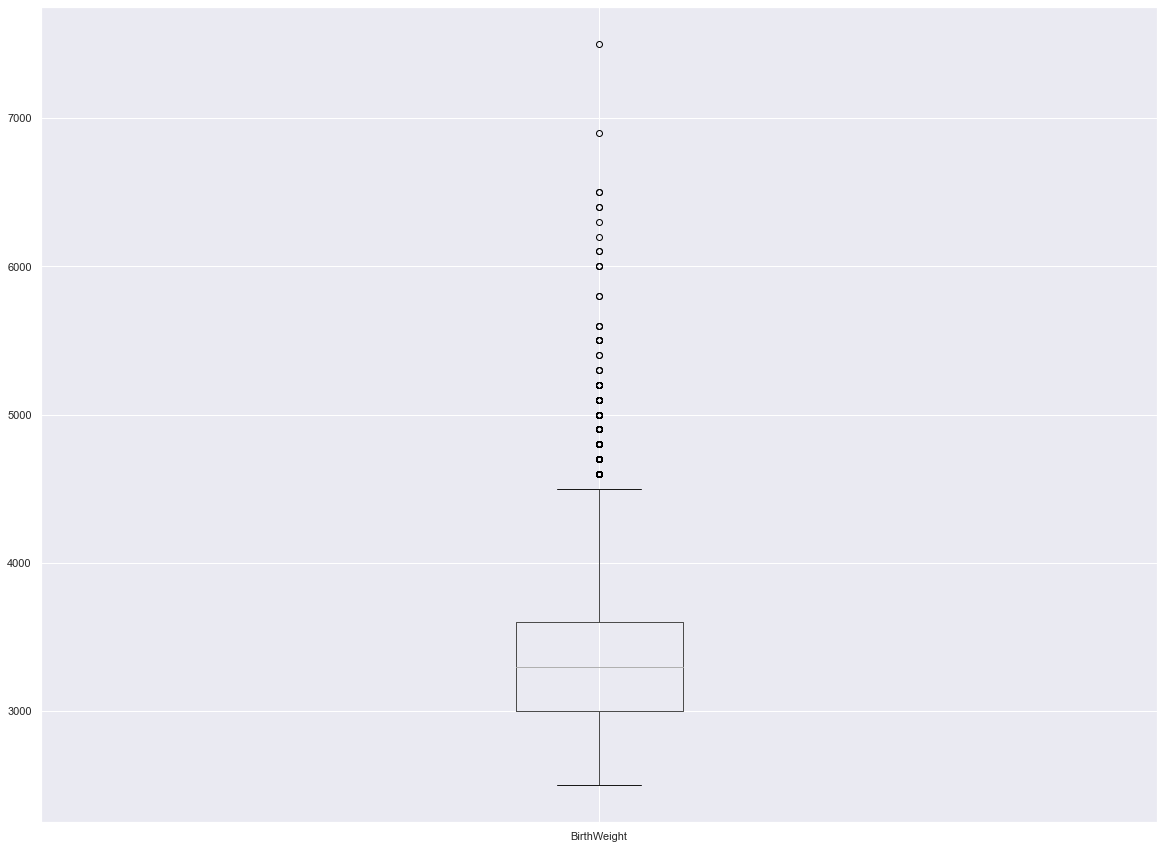

In [47]:
train.boxplot('BirthWeight')

### ---------> OBSERVATION
****
The newborn child who weight nearly and more than 7000 seem to be rare but it's still acceptable

<a id="2.9"></a>
# 📂 2.9 Save the Intermediate data
***
After the cleaning step, all data is saved to a csv file for visualisation step later in dash.

In [48]:
train.to_csv("Data/train_cleaned.csv", encoding='utf-8')
test.to_csv("Data/test_cleaned.csv", encoding='utf-8')

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>

**Assumptions:**
- **LengthOfStay**: The number of people who stay more than 3 days in the hospital is higher than the people who stay less than 3 days.
- **AverageCostInCounty**: the people who stay more than 3 days in the hospital have to pay a higher cost.
- **Gender**: More female survived than male, and the number of female stay in the hospital more than 3 days is higher than male 
- **APRSeverityOfIllnessCode**: the number of patient having the extreme severity is higher. The more serious illness that a patient have, the higher money they have to pay.
- **Race**: the number of medical cost the Black/African American have to pay higher than others, and the White people pay the lowest cost. Hence, the number of White patient is the highest.

Now, let's see how the features are related to each other by creating some visualizations. 

<a id="3.1"></a>
# 3.1 Overall look on target variable

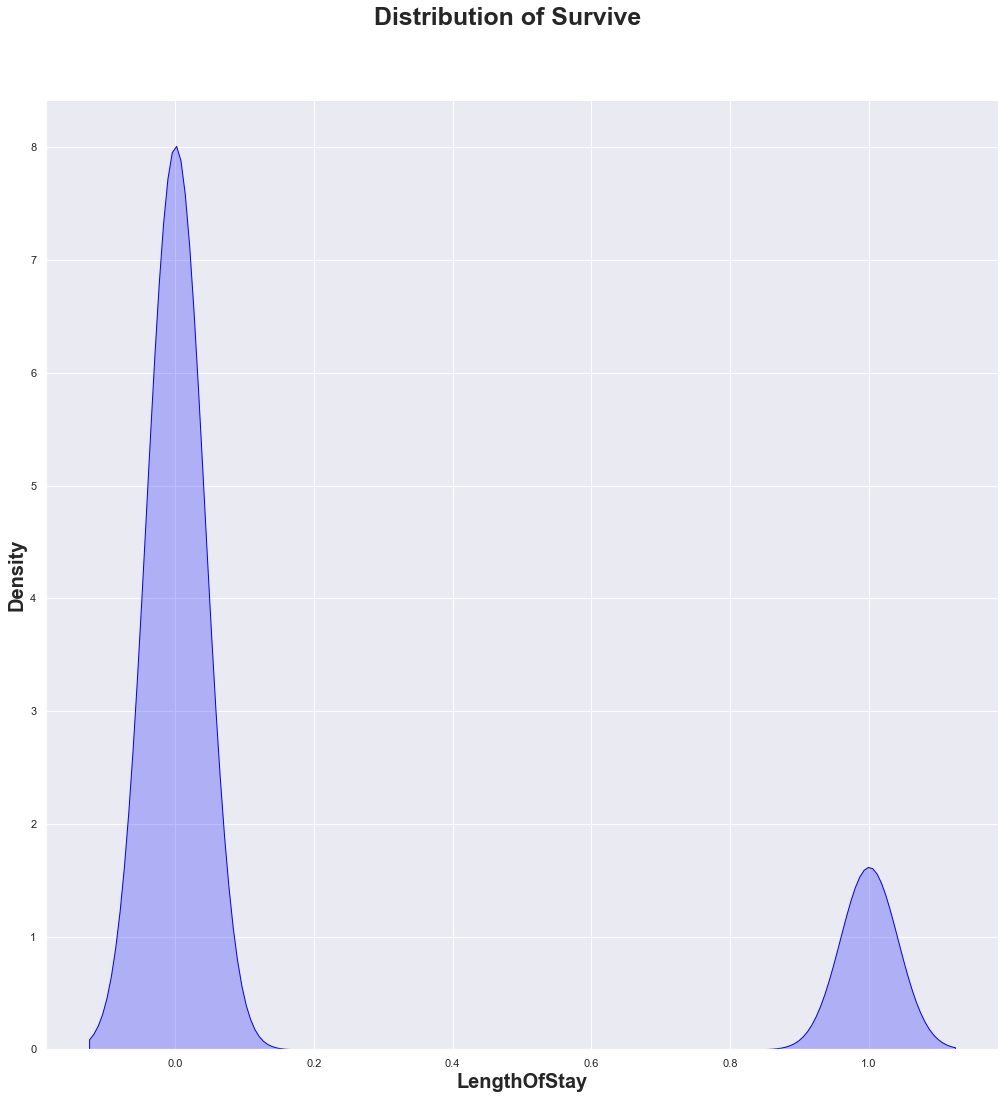

In [49]:
# sns.displot(train, x="Survived", hue="Pclass", kind="kde", fill=True)
plot = sns.displot(train, x="LengthOfStay", kind="kde", fill=True, color='blue', height= 14)


plot.fig.suptitle("Distribution of Survive", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("LengthOfStay", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Density", fontsize = 20, fontweight = 'bold')

### ---------> OBSERVATION
***
- It is a bionormal distribution
- More people stay more than 3 days than people stay in the hospital less than 3 days.

## Proportion of length of stay

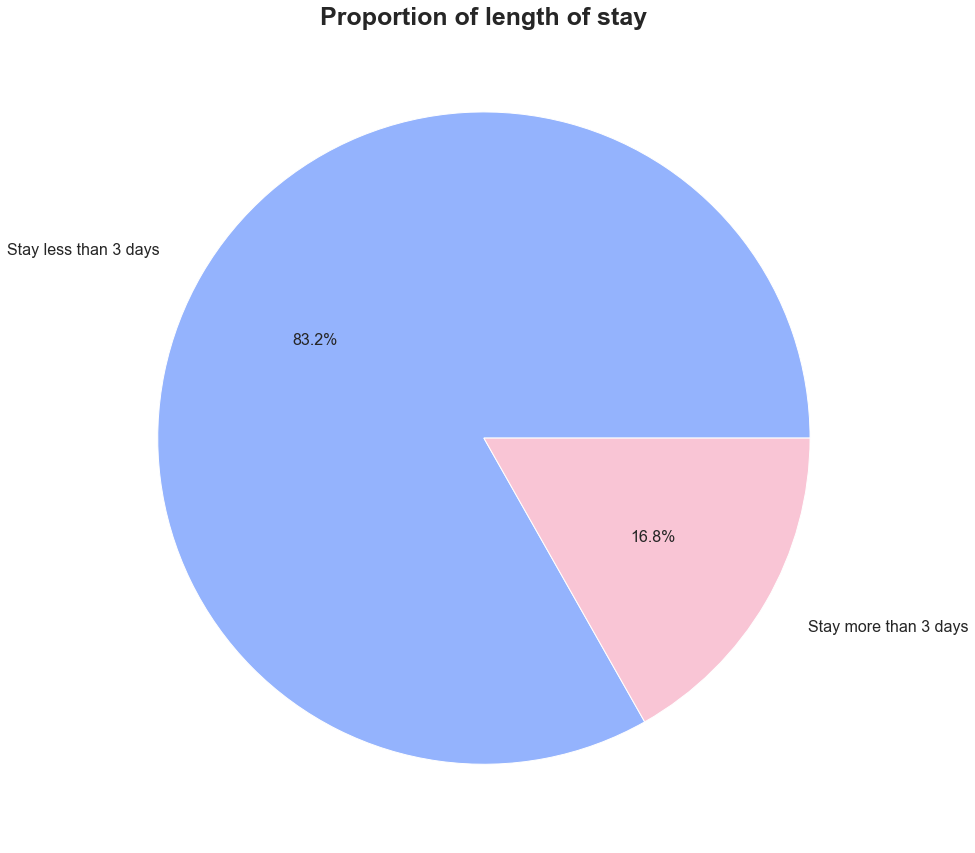

In [50]:
# Pie chart
labels = ['Stay less than 3 days', 'Stay more than 3 days']
#colors
colors = ['#94B3FD', '#F9C5D5']
ax = plt.pie(train['LengthOfStay'].value_counts(), labels=labels, labeldistance=1.15, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Proportion of length of stay', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

### ---------> OBSERVATION
***
This pie plot is chosen to demonstrates the proportion of people stay less than 3 days vs people stay more than 3 days. Overall, stay in the hospital less than 3 days is the most common options for pantents accounts for more than 83 percent, while just only nearly 17 percent of patient choose to stay more than 3 days. The number people stay less than 3 days is nearly 8 time higher than those people who stay more than 3 days.

<a id="3.2"></a>
# 3.2 Frequency of each corresponiding Target variable type
****

## Medical Cost of both group stay more vs less than 3 days in Hospital

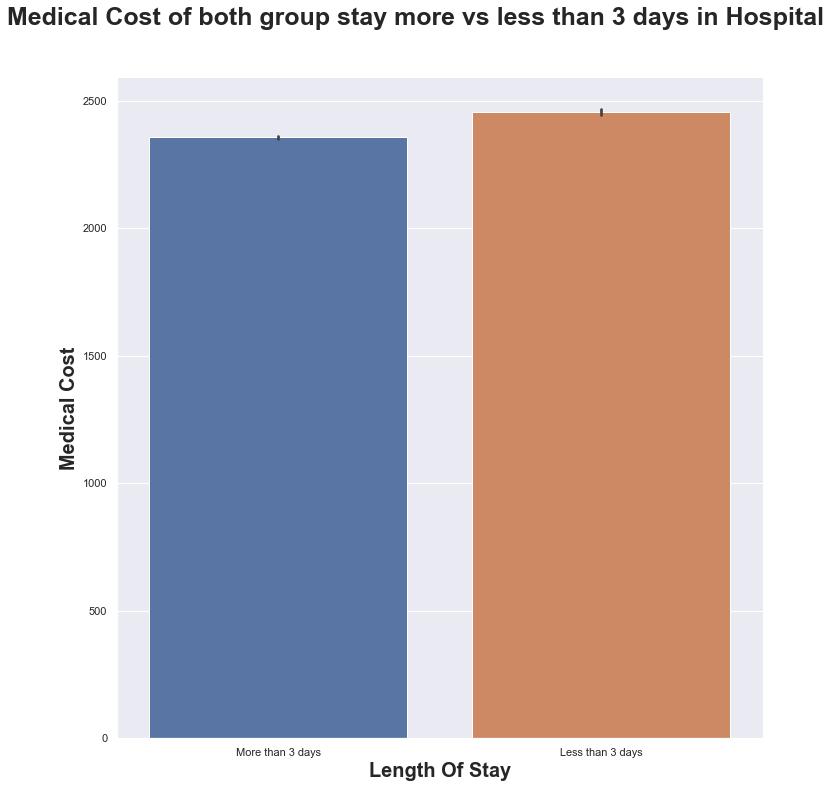

In [51]:
sns.set(style="darkgrid")

plot = sns.catplot(data=train, kind="bar", x="LengthOfStay", y="AverageCostInCounty", height = 10)

plot.fig.suptitle("Medical Cost of both group stay more vs less than 3 days in Hospital", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Length Of Stay", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Medical Cost", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]
plot.set_xticklabels(['More than 3 days', 'Less than 3 days'])


### ---------> OBSERVATION
***
This bar chart demonstrates the medical cost that both group stay more than 3 days and stay less than 3 days have to pay for the hospital, it is chosen since it can compare the magnitude between the number of people who stay more than 3 days and stay less than 3 day. Same as we expected, the group stay more than 3 days have to pay more medical cost than the group stay less than 3 days.

## Length of stay of each serverity of illness group

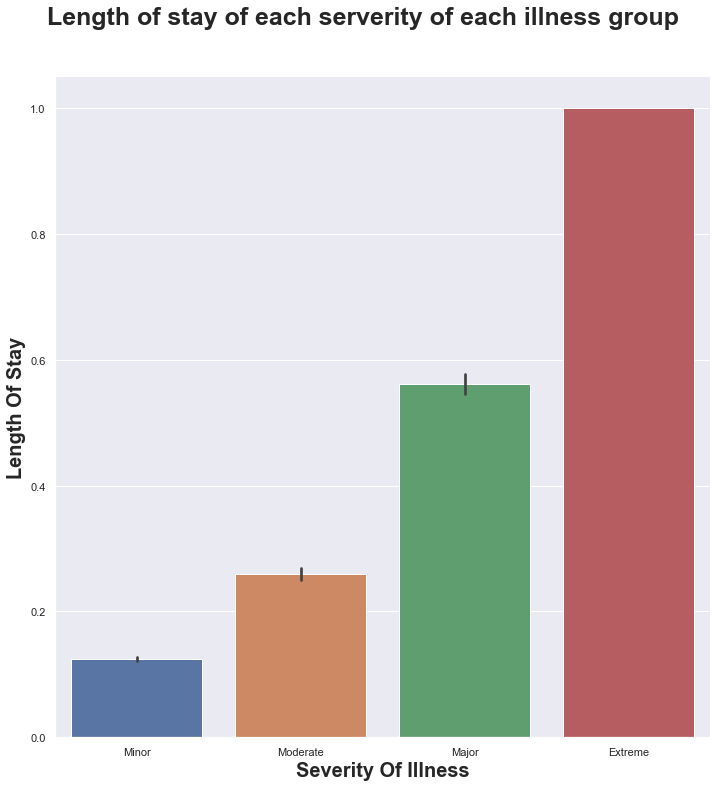

In [52]:
sns.set(style="darkgrid")

plot = sns.catplot(data=train, kind="bar", x="APRSeverityOfIllnessCode", y="LengthOfStay", height = 10)

plot.fig.suptitle("Length of stay of each serverity of each illness group", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Severity Of Illness", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Length Of Stay", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]
plot.set_xticklabels(['Minor', 'Moderate', 'Major', 'Extreme'])


### ---------> OBSERVATION
***
According to this bar chart, the severity of illness number 4 stay in the hospital more than 3 days, while the patient having the severity number 1 stay in the hospital less than 3 days.

## Patient Gender Distribution - Stay less vs more than 3 days

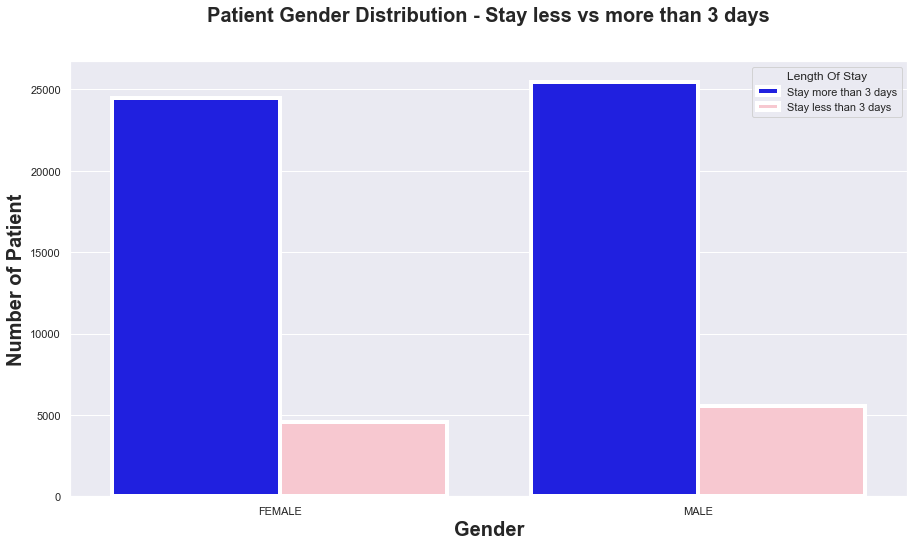

In [53]:
pal = {1:"pink", 0:"blue"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Gender", 
                   hue="LengthOfStay",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Patient Gender Distribution - Stay less vs more than 3 days", fontsize = 20, fontweight = 'bold', pad=40)
plt.xlabel("Gender", fontsize = 20, fontweight = 'bold');
plt.ylabel("Number of Patient", fontsize = 20, fontweight = 'bold')

## Fixing legends
leg = ax.get_legend()
leg.set_title("Length Of Stay")
legs = leg.texts
legs[0].set_text("Stay more than 3 days")
legs[1].set_text("Stay less than 3 days")
plt.show()
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
***
This bar chart is chosen since it can compare the magnitude between the number of people who stay more than 3 days and stay less than 3 days in both genders male and female. Overall, the number of gender is approximately equal, the male is unconsiderably higher a little bit. Hence, my assumption there are more female than male is incorrect. 

## APR Severity Of Illness Code Distribution - Stay less vs more than 3 days

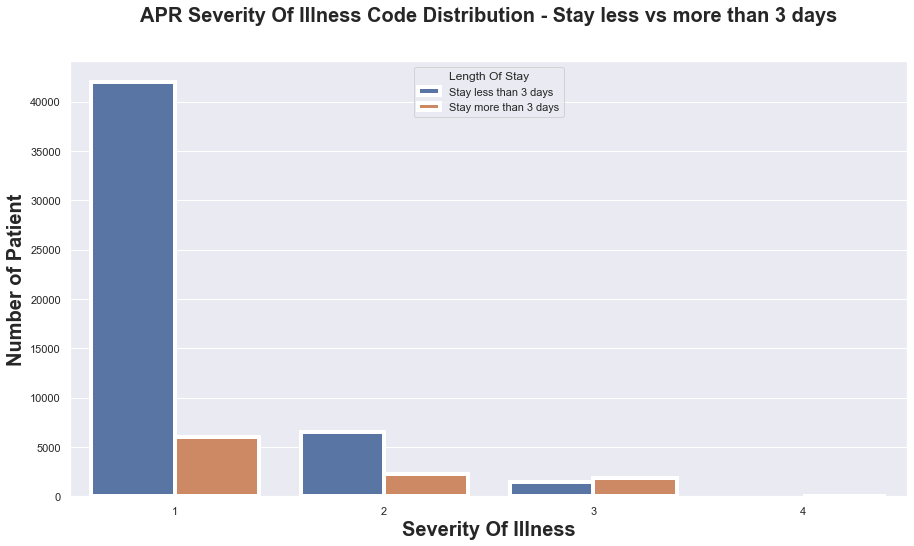

In [54]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "APRSeverityOfIllnessCode", 
                   hue="LengthOfStay",
                   data = train, 
                   linewidth=4)

## Fixing title, xlabel and ylabel
plt.title("APR Severity Of Illness Code Distribution - Stay less vs more than 3 days", fontsize = 20, fontweight = 'bold', pad=40)
plt.xlabel("Severity Of Illness", fontsize = 20, fontweight = 'bold');
plt.ylabel("Number of Patient", fontsize = 20, fontweight = 'bold')

## Fixing legends
leg = ax.get_legend()
leg.set_title("Length Of Stay")
legs = leg.texts
legs[0].set_text("Stay less than 3 days")
legs[1].set_text("Stay more than 3 days")
plt.show()
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
***
This bar chart displays the number of people in each APR Severity of Illness, it is chosen since it can compare the magnitude between the number people between 4 different severity of illness. Overall, the group severity of illness level 1 has the highest number of patient and they tend to stay in the hospital less than 3 days. Because of that, my assumption for the `APRSeverityOfIllnessCode` is incorrect since the the number of patient having the extreme severity is lower. Moreover, it is just a sample data so that it may be because it is collected from a hospital which do not have enough professional doctors to deal with the extreme illness.

## Race Distribution - Stay less vs more than 3 days

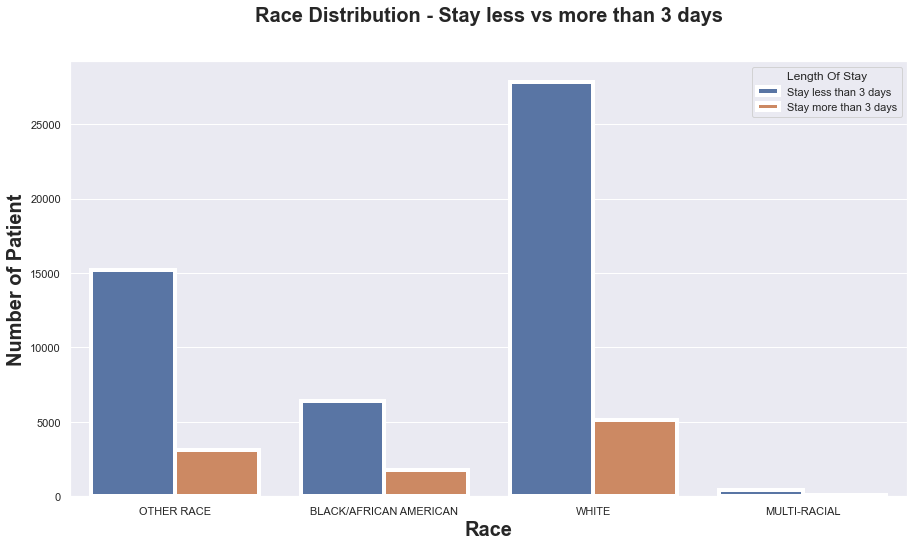

In [55]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Race", 
                   hue="LengthOfStay",
                   data = train, 
                   linewidth=4)

## Fixing title, xlabel and ylabel
plt.title("Race Distribution - Stay less vs more than 3 days", fontsize = 20, fontweight = 'bold', pad=40)
plt.xlabel("Race", fontsize = 20, fontweight = 'bold');
plt.ylabel("Number of Patient", fontsize = 20, fontweight = 'bold')

## Fixing legends
leg = ax.get_legend()
leg.set_title("Length Of Stay")
legs = leg.texts
legs[0].set_text("Stay less than 3 days")
legs[1].set_text("Stay more than 3 days")
plt.show()
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
***
This count bar plot illustrates the number of patient by races and the day they stay in the hospital. Overall, same as we expected, most of the patients are the white people. Although this is just the sample data but, let's find out the reason the why the Black/Afrian American do not have people stay hospital.

## Severity of illness of each reaces

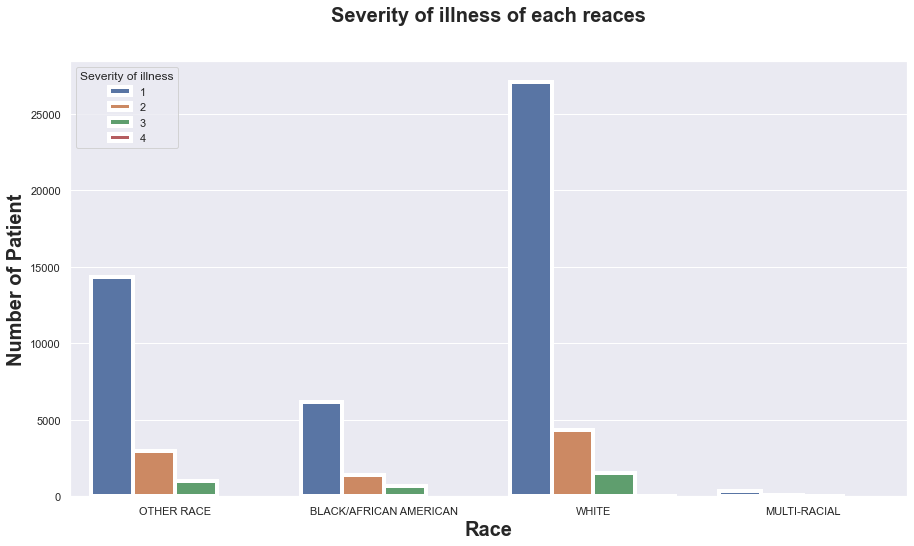

In [56]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Race", 
                   hue="APRSeverityOfIllnessCode",
                   data = train, 
                   linewidth=4)

## Fixing title, xlabel and ylabel
plt.title("Severity of illness of each reaces", fontsize = 20, fontweight = 'bold', pad=40)
plt.xlabel("Race", fontsize = 20, fontweight = 'bold');
plt.ylabel("Number of Patient", fontsize = 20, fontweight = 'bold')

## Fixing legends
leg = ax.get_legend()
leg.set_title("Severity of illness")
legs = leg.texts
plt.show()
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
***
According to this bar chart, the white people have the highest number of people who have the severity of illness from 2 to 3. That can be the reasons why they stay in the hospital more than 3 days in the hospital.

## Medical Cost of each Race in both group stay more vs less than 3 days in Hospital

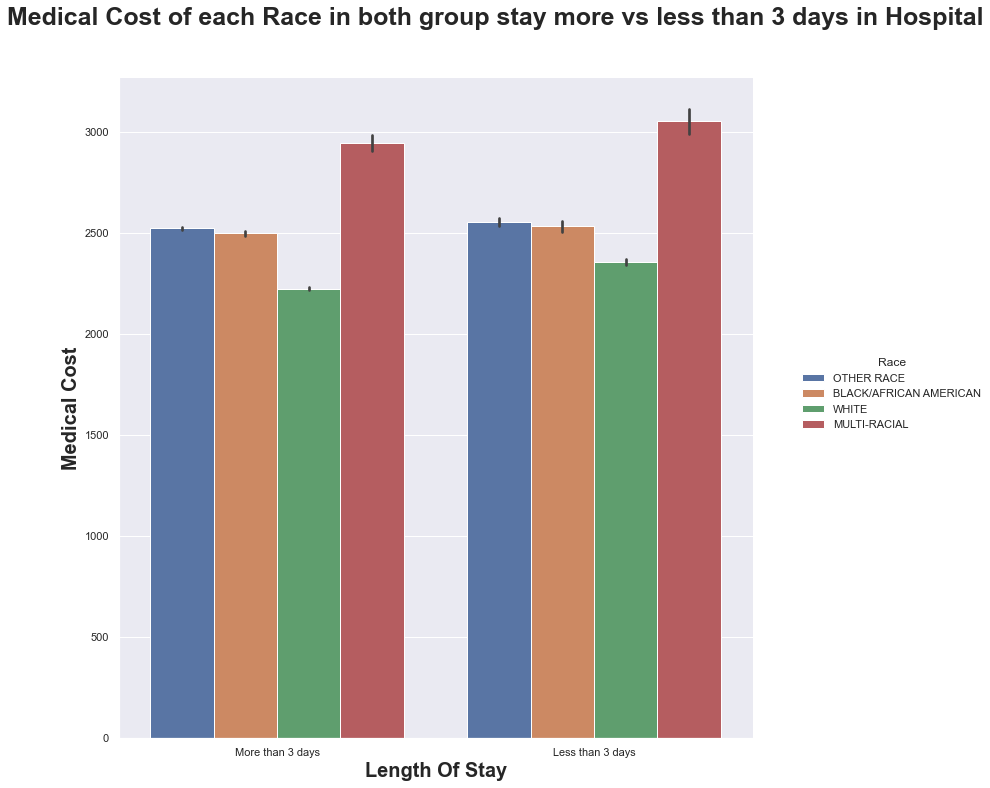

In [57]:
sns.set(style="darkgrid")

plot = sns.catplot(data=train, kind="bar", x="LengthOfStay", y="AverageCostInCounty",  hue="Race", height = 10)
plot.set_xticklabels(['More than 3 days', 'Less than 3 days'])

plot.fig.suptitle("Medical Cost of each Race in both group stay more vs less than 3 days in Hospital", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Length Of Stay", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Medical Cost", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
***
This bar plot displays medical cost of each race in both group stay more vs less than 3 days in hospital. Overall, same as we expected, it may be because the Black/African American people have to pay more medical cost in either stay more or less than 3 days option. However, it is still interesting that the white people have more extreme illness but they still pay the lowest.

## Medical Cost of each Severity of illness in both group stay more vs less than 3 days in Hospital

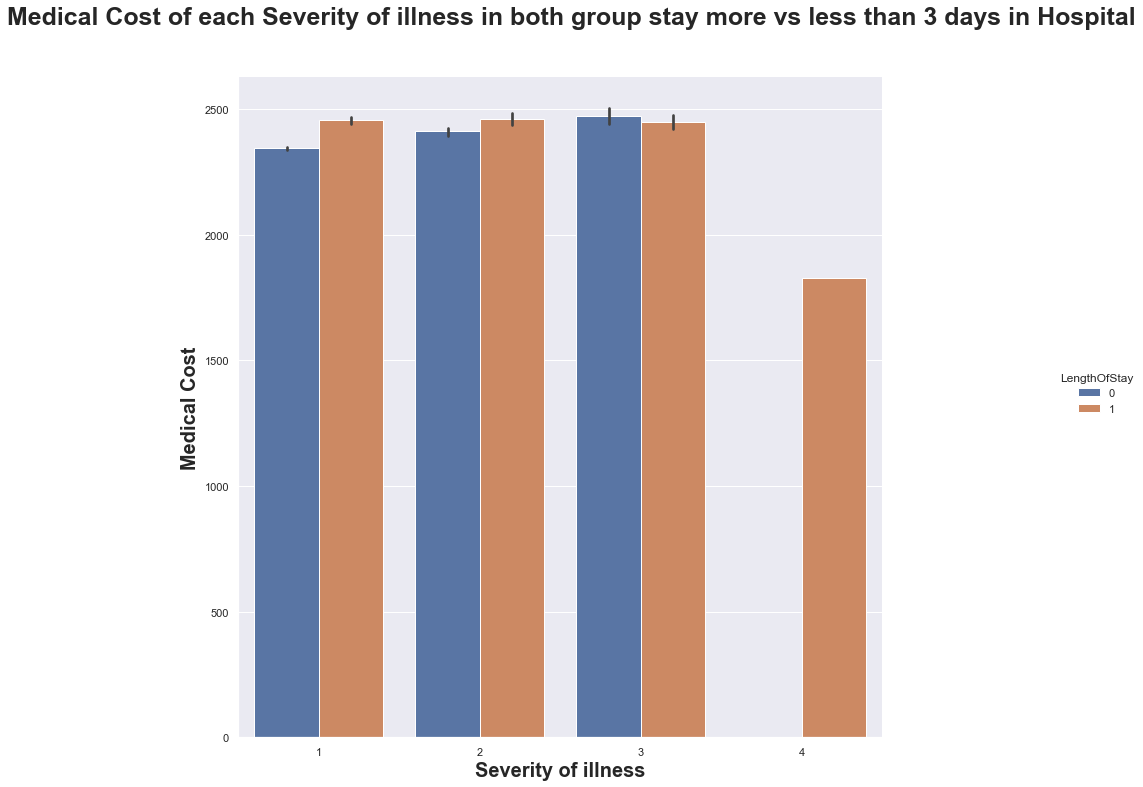

In [58]:
sns.set(style="darkgrid")

plot = sns.catplot(data=train, kind="bar", x="APRSeverityOfIllnessCode", y="AverageCostInCounty",  hue="LengthOfStay", height = 10)

plot.fig.suptitle("Medical Cost of each Severity of illness in both group stay more vs less than 3 days in Hospital", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("Severity of illness", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Medical Cost", fontsize = 20, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]

### ---------> OBSERVATION
***
This bar chart is utilised for comparing the magnitude of the medical cost of 2 options which are stay more than 3 days and stay less than 3 days in 4 different of illness. Overall, suprisingly, the group of people who have the most extreme illness pay the lowest cost, while the moderate and the major pay the highest amount of money.

## Average hospitalization Cost Distribution Stay more vs less than 3 days

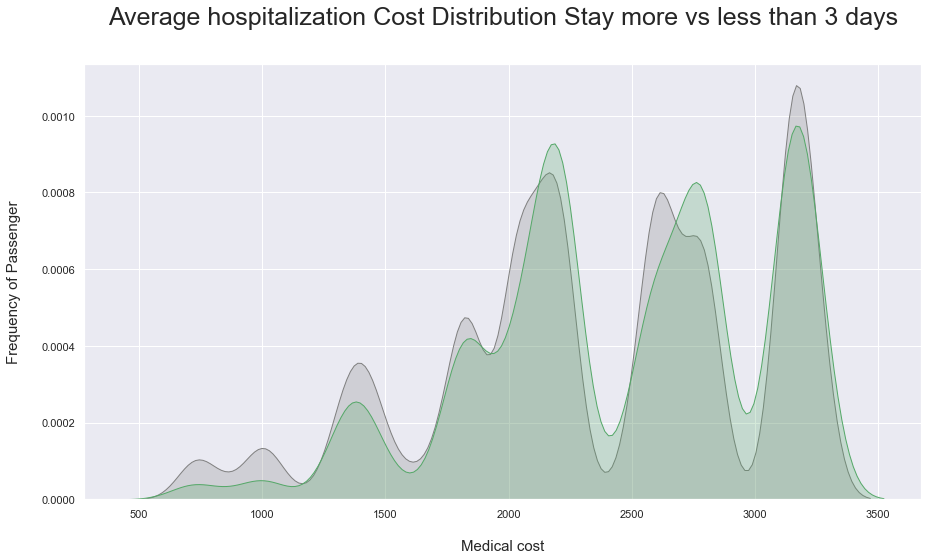

In [59]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 0),'AverageCostInCounty'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 1),'AverageCostInCounty'] , color='g',shade=True)
plt.title('Average hospitalization Cost Distribution Stay more vs less than 3 days', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger", fontsize = 15, labelpad = 20)
plt.xlabel("Medical cost", fontsize = 15, labelpad = 20);

### ---------> OBSERVATION
***
This graph demonstrates the Average Hospitality Cost of both groups which are stay more or less than 3 days. Most of people have to pay around 3000 to 3500 for their medical cost for both group stay more and less than 3 days. Suprisingly, most of the people who stay less than 3 days in hospital have to pay a slightly higher medical cost.

## Birth Weight Distribution - Stay more vs less than 3 days

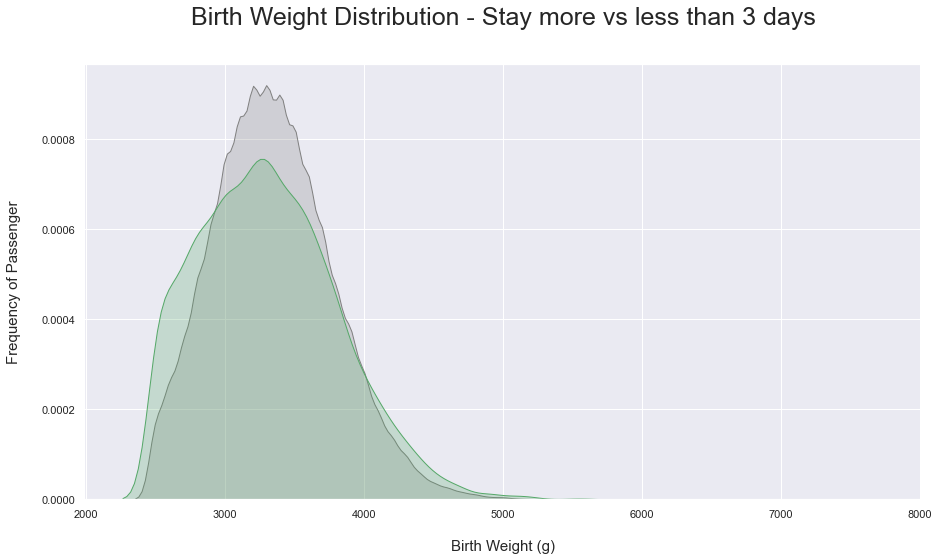

In [60]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 0),'BirthWeight'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 1),'BirthWeight'] , color='g',shade=True)
plt.title('Birth Weight Distribution - Stay more vs less than 3 days', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger", fontsize = 15, labelpad = 20)
plt.xlabel("Birth Weight (g)", fontsize = 15, labelpad = 20);

### ---------> OBSERVATION
***
According to graph, most of the newborn have the birth weigth around from 3000 to 4000 gram. Moreover, most of the newborn having the birth weigth from 3000 to 4000 gram stay in the hospital less than 3 days. 

## Average Charges In County Distribution - Stay more vs less than 3 days

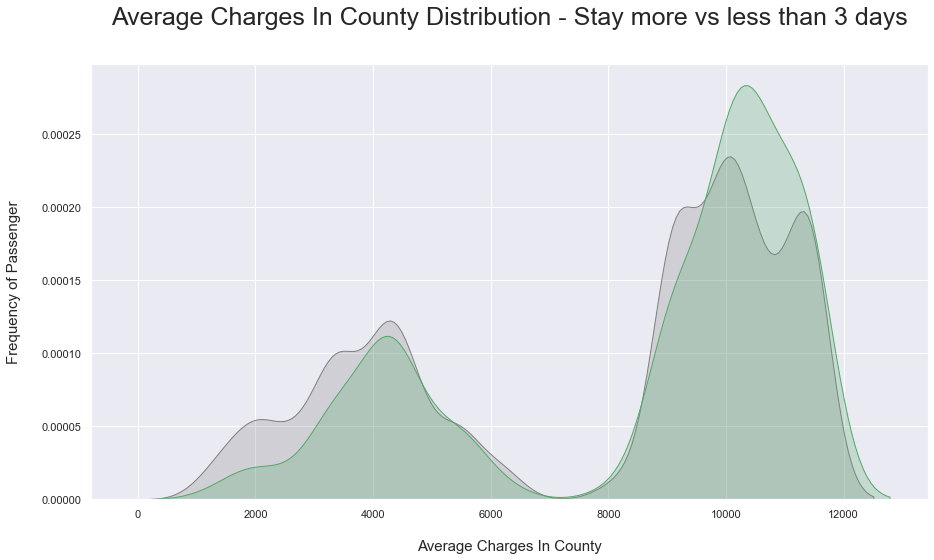

In [61]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 0),'AverageChargesInCounty'] , color='gray',shade=True)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 1),'AverageChargesInCounty'] , color='g',shade=True)
plt.title('Average Charges In County Distribution - Stay more vs less than 3 days', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger", fontsize = 15, labelpad = 20)
plt.xlabel("Average Charges In County", fontsize = 15, labelpad = 20);

### ---------> OBSERVATION
***
This plot can be divided into 2 part which are from 0 to 6000 and 8000 to 12000. Overall, most of the people who stay more than 3 days in hospital are from the counties which have the higher average medical charges. 

## Average Cost In Facility Distribution - Stay more vs less than 3 days

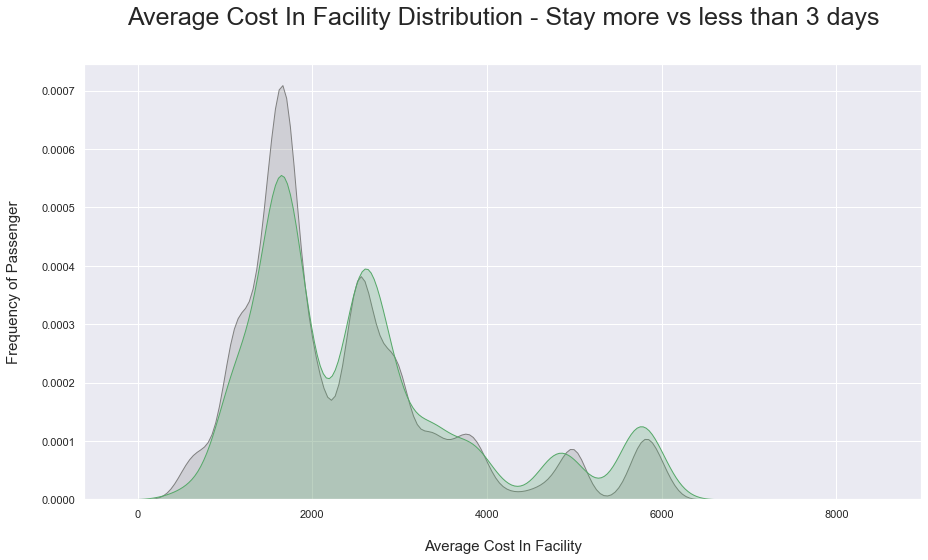

In [62]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 0),'AverageCostInFacility'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 1),'AverageCostInFacility'] , color='g',shade=True, label='survived')
plt.title('Average Cost In Facility Distribution - Stay more vs less than 3 days', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger", fontsize = 15, labelpad = 20)
plt.xlabel("Average Cost In Facility", fontsize = 15, labelpad = 20);

### ---------> OBSERVATION
***
This plot demonstrates the average charges in facility. Overall, the people who do not stay in the hospital more than 3 days but still have to pay higher cost in facility than the people who stay more than 3 days in the hospital.

## Average Charges In Facility Distribution - Stay more vs less than 3 days

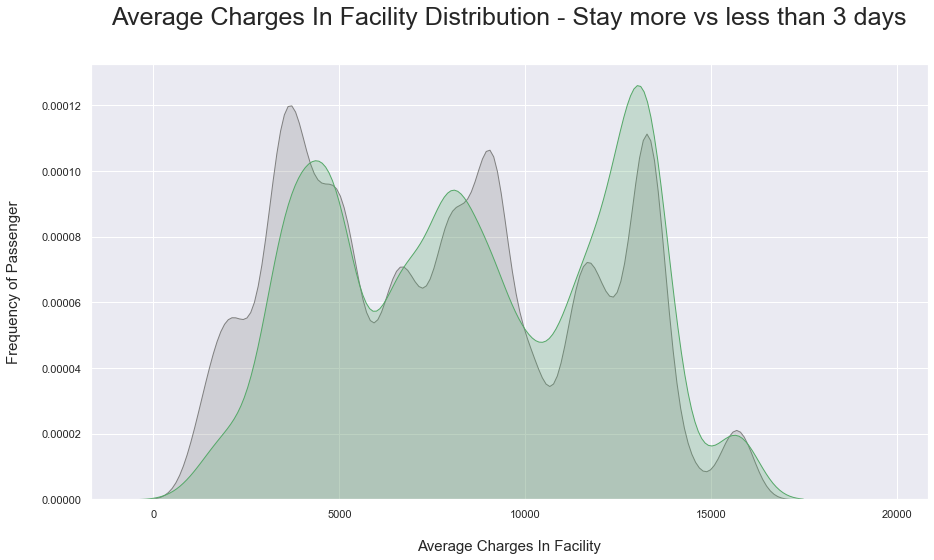

In [63]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 0),'AverageChargesInFacility'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['LengthOfStay'] == 1),'AverageChargesInFacility'] , color='g',shade=True, label='survived')
plt.title('Average Charges In Facility Distribution - Stay more vs less than 3 days', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger", fontsize = 15, labelpad = 20)
plt.xlabel("Average Charges In Facility", fontsize = 15, labelpad = 20);

## Factorplot of Average Charges In Facility Length Of Stay

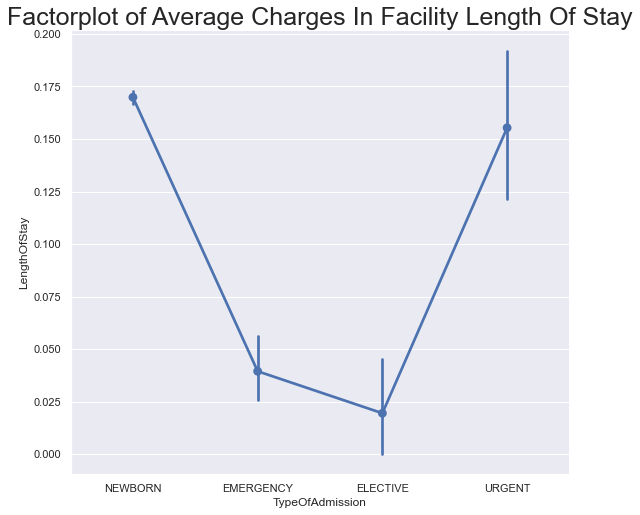

In [64]:
sns.factorplot(x =  "TypeOfAdmission", y = "LengthOfStay", data = train,kind = "point",size = 8)
plt.title('Factorplot of Average Charges In Facility Length Of Stay', fontsize = 25)
plt.subplots_adjust(top=0.85)

### ---------> OBSERVATION
***
From this plot, the Newborn and the Urgent people have the tendency to stay more than 3 days in the hospital

<a id="3.3"></a>
# 3.3 Summary
****
> - Most of people stay less than 3 days in the hospital.
> - Most of people who have the minor illness tend to stay less than 3 days in the hospital
> - People have the extreme illness have the tendency to stay more than 3 days in the hospital.
> - People who stay more than 3 days in the hospital have to pay the higher medical cost.
> - The number of Female vs Male patient is approximately equal.
> - The number of patient who have the extreme illness is lower than those people have the minor illness.
> - The number of white people is higher than the number of people who are Black/African American and multi-racial. Moreover, those white people

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 4. Statistical Overview</strong></h1>


<a id="4.1"></a>
# 4.1 Descriptive statistics for Variability
****

In [65]:
train.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.429877,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,0.167945
std,89.497449,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,0.373821
min,0.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,0.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,0.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,0.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,0.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,1.000000


In [66]:
train.describe(include =['O'])

,Gender,Race,TypeOfAdmission,PaymentTypology,EmergencyDepartmentIndicator
count,59966,59966,59966,59966,59966
unique,2,4,4,9,2
top,MALE,WHITE,NEWBORN,MEDICAID,N
freq,30978,32943,58741,28723,59453


In [67]:
survived_summary = train.groupby("Gender")
survived_summary.mean().reset_index()

,Gender,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,LengthOfStay
0,FEMALE,160.214227,1.235649,3280.160756,2367.987892,7943.179040,2390.916655,7916.119291,0.156582
1,MALE,150.952870,1.272322,3388.830783,2377.315934,8012.765543,2401.558816,7998.105301,0.178578


In [68]:
survived_summary = train.groupby("APRSeverityOfIllnessCode")
survived_summary.mean().reset_index()

,APRSeverityOfIllnessCode,CCSProcedureCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,LengthOfStay
0,1,152.578024,3337.832878,2357.625696,7900.053365,2385.031218,7862.733635,0.124434
1,2,165.563813,3343.436073,2424.116096,8255.956164,2408.227283,8297.228653,0.260046
2,3,170.165744,3294.710947,2458.615621,8400.584256,2532.371771,8458.522448,0.561193
3,4,216.000000,2500.000000,1826.000000,4190.000000,2635.000000,5268.000000,1.000000


### ---------> OBSERVATION
***
- This train data set has 891 raw and 9 columns. 
- Only 17% people stay more than 3 days in the hospital.
- Only 16% female and 18% male stay more than 3 days in the hospital.
- Only 12% people having the minor illness and 26% people having the moderate illness stays more than 3 days in the hospital, meanwhile, more than half of the people having major and 100% people having the extreme illness stay more than 3 days in the hospital

In [69]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Gender'] = train.Gender.apply(lambda x: 0 if x == "FEMALE" else 1)
test['Gender'] = test.Gender.apply(lambda x: 0 if x == "FEMALE" else 1)

<a id="4.2"></a>
# 4.2 Correlation Matrix and Heatmap
****

<a id="4.2.1"></a>
## 4.2.1 Correlation Matrix
****

In [70]:
pd.DataFrame(abs(train.corr()['LengthOfStay']).sort_values(ascending = False))

,LengthOfStay
LengthOfStay,1.000000
APRSeverityOfIllnessCode,0.274993
AverageChargesInCounty,0.082964
AverageChargesInFacility,0.077293
AverageCostInFacility,0.064825
AverageCostInCounty,0.057574
CCSProcedureCode,0.034967
Gender,0.029405
BirthWeight,0.029268


### ---------> OBSERVATION
***
**`APRSeverityOfIllnessCode` is the most important correlated feature with *`LengthOfStay`(dependent variable)* feature followed by Pclass.** 

In [71]:
## get the most important variables. 
corr = train.corr()**2
corr.LengthOfStay.sort_values(ascending=False)

LengthOfStay                1.000000
APRSeverityOfIllnessCode    0.075621
AverageChargesInCounty      0.006883
AverageChargesInFacility    0.005974
AverageCostInFacility       0.004202
AverageCostInCounty         0.003315
CCSProcedureCode            0.001223
Gender                      0.000865
BirthWeight                 0.000857
Name: LengthOfStay, dtype: float64

**Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships.** 

<a id="4.2.2"></a>
## 4.2.2 Heat map
****

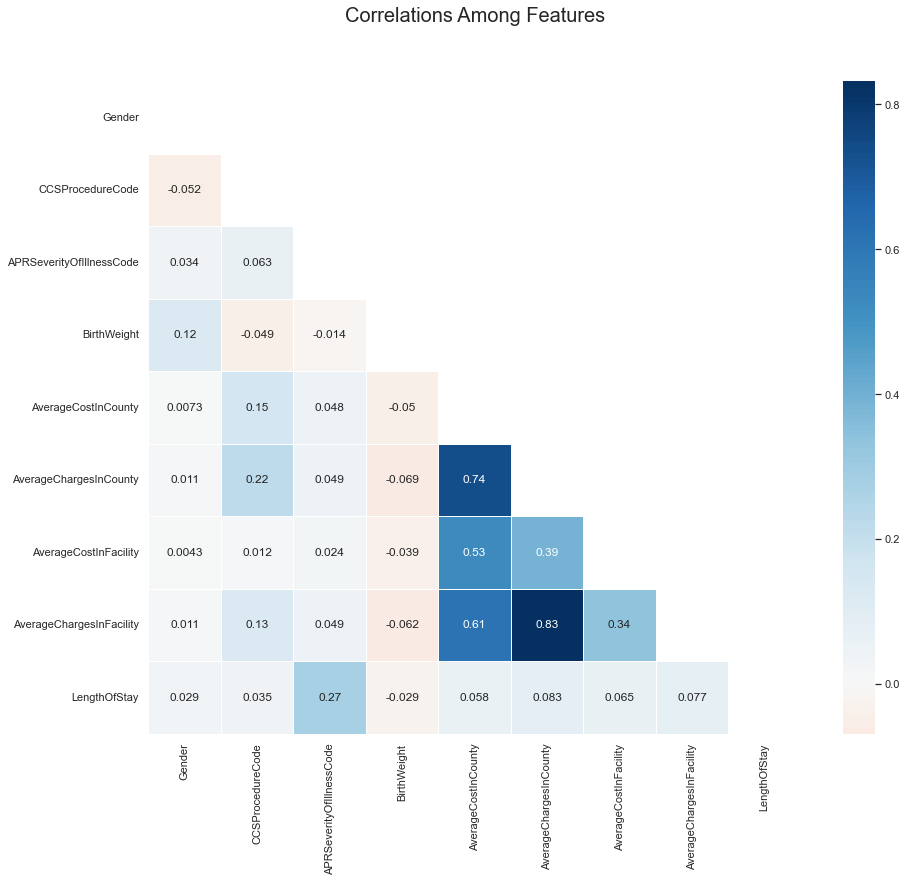

In [72]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

### ---------> OBSERVATION
***
#### Positive Correlation Features:
- Gender and LengthOfStay: 0.029
- CCSProcedureCode and LengthOfStay: 0.035
- APRSeverityOfIllnessCode and LengthOfStay: 0.27
- AverageCostInCounty and LengthOfStay: 0.058


#### Negative Correlation Features:
- BirthWeight and LengthOfStay: -0.029

<a id="4.3"></a>
# 4.3 Statistical Test for Correlation
****
> **Null Hypothesis($H_0$):**  male mean is greater or equal to female mean.  
>  **Alternative Hypothesis($H_A$):** male mean is less than female mean.

In [73]:
male_mean = train[train['Gender'] == 1].LengthOfStay.mean()

female_mean = train[train['Gender'] == 0].LengthOfStay.mean()
print ("Male LengthOfStay mean: " + str(male_mean))
print ("female LengthOfStay mean: " + str(female_mean))

print ("The mean difference between male and female LengthOfStay: " + str(male_mean - female_mean))

Male LengthOfStay mean: 0.17857834592291302
female LengthOfStay mean: 0.15658203394508072
The mean difference between male and female LengthOfStay: 0.021996311977832306


### ---------> OBSERVATION
***
Not accept Null Hypothesis ($H_0$)

In [74]:
# separating male and female dataframe. 
import random
male = train[train['Gender'] == 1]
female = train[train['Gender'] == 0]

## empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['LengthOfStay']),50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['LengthOfStay']),50,)))
    

# Print them out
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(m_mean_samples) - np.mean(f_mean_samples),2)}")

Male mean sample mean: 0.18
Male mean sample mean: 0.16
Difference between male and female mean sample mean: 0.01


H0: male mean is greater or equal to female mean<br>
H1: male mean is less than female mean

According to the samples our male samples ($\bar{x}_m$) and female samples($\bar{x}_f$) mean measured difference is ~ 0.55(statistically this is called the point estimate of the male population mean and female population mean). keeping in mind that...
* We randomly select 50 people to be in the male group and 50 people to be in the female group. 
* We know our sample is selected from a broader population(trainning set). 
* We know we could have totally ended up with a different random sample of males and females.
***
With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a **t-test** to evaluate that. When we perform a **t-test** we are usually trying to find out **an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between two population means(2 sample t-test).** 



The **t-statistics** is the measure of a degree to which our groups differ standardized by the variance of our measurements. In order words, it is basically the measure of signal over noise. Let us describe the previous sentence a bit more for clarification. I am going to use [this post](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen) as reference to describe the t-statistics here. 


#### Calculating the t-statistics
# $$t = \frac{\bar{x}-\mu}{\frac{S} {\sqrt{n}} }$$

Here..
* $\bar{x}$ is the sample mean. 
* $\mu$ is the hypothesized mean. 
* S is the standard deviation. 
* n is the sample size. 


1. Now, the denominator of this fraction $(\bar{x}-\mu)$ is basically the strength of the signal. where we calculate the difference between hypothesized mean and sample mean. If the mean difference is higher, then the signal is stronger. 

the numerator of this fraction ** ${S}/ {\sqrt{n}}$ ** calculates the amount of variation or noise of the data set. Here S is standard deviation, which tells us how much variation is there in the data. n is the sample size. 

So, according to the explanation above, the t-value or t-statistics is basically measures the strength of the signal(the difference) to the amount of noise(the variation) in the data and that is how we calculate the t-value in one sample t-test. However, in order to calculate between two sample population mean or in our case we will use the follow equation. 

# $$t = \frac{\bar{x}_M - \bar{x}_F}{\sqrt {s^2 (\frac{1}{n_M} + \frac{1}{n_F})}}$$

This equation may seem too complex, however, the idea behind these two are similar. Both of them have the concept of signal/noise. The only difference is that we replace our hypothesis mean with another sample mean and the two sample sizes repalce one sample size. 

Here..
* $\bar{x}_M$ is the mean of our male group sample measurements. 
* $ \bar{x}_F$ is the mean of female group samples. 
* $ n_M$ and $n_F$ are the sample number of observations in each group. 
* $ S^2$ is the sample variance.

It is good to have an understanding of what going on in the background. However, we will use **scipy.stats** to find the t-statistics. 


<a id="5"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🛠 5. Feature Engineering</strong></h1>

Feature Engineering is exactly what its sounds like. Sometimes we want to create extra features from with in the features that we have, sometimes we want to remove features that are alike. Features engineering is the simple word for doing all those. It is important to remember that we will create new features in such ways that will not cause **multicollinearity(when there is a relationship among independent variables)** to occur. 

<a id="5.1"></a>
# 5.1 Separating dependent and independent variables
****
Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable. The way we use machine learning algorithm in a dataset is that we train our machine learning model by specifying independent variables and dependent variable. To specify them, we need to separate them from each other, and the code below does just that.

P.S. In our test dataset, we do not have a dependent variable feature. We are to predict that using machine learning models.

In [75]:
# separating our independent and dependent variable
X = train.drop(['LengthOfStay'], axis = 1)
y = train["LengthOfStay"]

<a id="5.2"></a>
# 5.2 Encoding
****
Encode categorical data into digits to fit and evaluate model.

#### Few reasons why categorical values can be difficult to deal with are:

- High cardinality (Features with a large number of levels)
- Algebraic Machine Learning models, whose input must be numerical. (Hence categorical must be transformed into numbers before applying a learning algorithm to them)
- It is difficult for an ML model to differentiate between highly different levels.